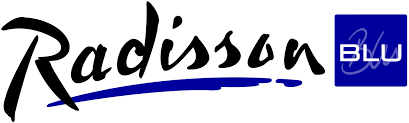 <br><br><br>
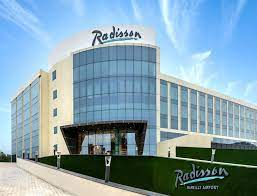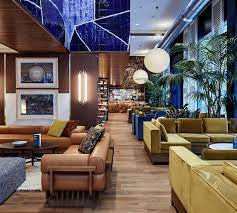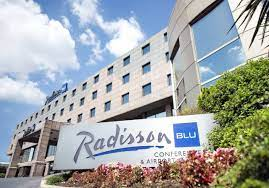! <br>
PS... I love Radisson 🏨🌴🌊

### Data visualization and EDA on the hotel reservations dataset
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [69]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [155]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
from pandas.api.types import CategoricalDtype
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
from tabulate import tabulate
import  plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import missingno as msno

cf.go_offline()




In [71]:
df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


 And now there's no null value but let's adjust the names of some of the columns for more clarity.
 
 ### Adjusting arrival_date column

In [72]:
df = df.rename(columns={'arrival_date': 'arrival_day'})

In [156]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_day', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'count', 'first_segment'],
      dtype='object')

## Missing data



In [73]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_day                             0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

*  There are no missing values in the dataset

### Data Columns Inspection

In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_day    

### Visualization
I am going to stick to the Radisson blue brand of colours as much as possible
https://www.schemecolor.com/radisson-blu-logo-colors.php



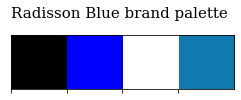

In [75]:
# Palette
sns.palplot(['black', 'blue', 'white','#107ab0'])

plt.title("Radisson Blue brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### The rise of hotel Reservation Cancellations
The rise of reservation channels has revolutionized the way customers book their stays, resulting in a shift in their behavior. Unfortunately, this has also led to a surge in the number of cancellations and no-shows, posing a significant challenge for hotels like Radisson. Customers cancel for a variety of reasons, including changes in plans and scheduling conflicts, often taking advantage of free or low-cost cancellation policies. While this benefits guests, it can be a revenue-diminishing factor for hotels. Therefore, it is crucial for hotels to be able to predict whether a customer will cancel their reservation or not, in order to optimize their revenue and minimize losses.

In [77]:
# For viz: Ratio of 2017 
df17=df.iloc[:,:].query('arrival_year == 2017')

x=df17.groupby(['booking_status'])['booking_status'].count()
y=len(df17)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

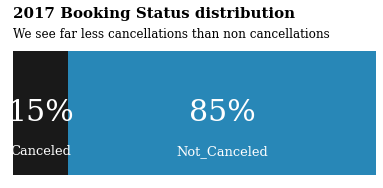

In [78]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Canceled'], 
        color='black', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Not_Canceled'], left=mf_ratio['Canceled'], 
        color='#107ab0', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Canceled'][i]*100)}%", 
                   xy=(mf_ratio['Canceled'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Canceled", 
                   xy=(mf_ratio['Canceled'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=13, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Not_Canceled'][i]*100)}%", 
                   xy=(mf_ratio['Canceled'][i]+mf_ratio['Not_Canceled'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Not_Canceled", 
                   xy=(mf_ratio['Canceled'][i]+mf_ratio['Not_Canceled'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=13, fontweight='light', fontfamily='serif',
                   color='white')
    
    
    # Title & Subtitle
fig.text(0.125,1.03,'2017 Booking Status distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see far less cancellations than non cancellations',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
    #ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [79]:
# For viz: Ratio of 2018
df18=df.iloc[:,:].query('arrival_year == 2018')

x=df18.groupby(['booking_status'])['booking_status'].count()
y=len(df18)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

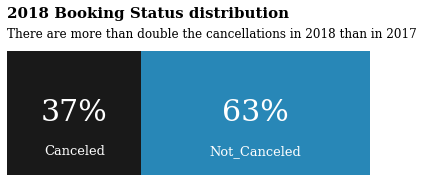

In [80]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Canceled'], 
        color='black', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Not_Canceled'], left=mf_ratio['Canceled'], 
        color='#107ab0', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Canceled'][i]*100)}%", 
                   xy=(mf_ratio['Canceled'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Canceled", 
                   xy=(mf_ratio['Canceled'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=13, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Not_Canceled'][i]*100)}%", 
                   xy=(mf_ratio['Canceled'][i]+mf_ratio['Not_Canceled'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Not_Canceled", 
                   xy=(mf_ratio['Canceled'][i]+mf_ratio['Not_Canceled'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=13, fontweight='light', fontfamily='serif',
                   color='white')
    
     # Title & Subtitle
fig.text(0.125,1.03,'2018 Booking Status distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'There are more than double the cancellations in 2018 than in 2017',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
    #ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

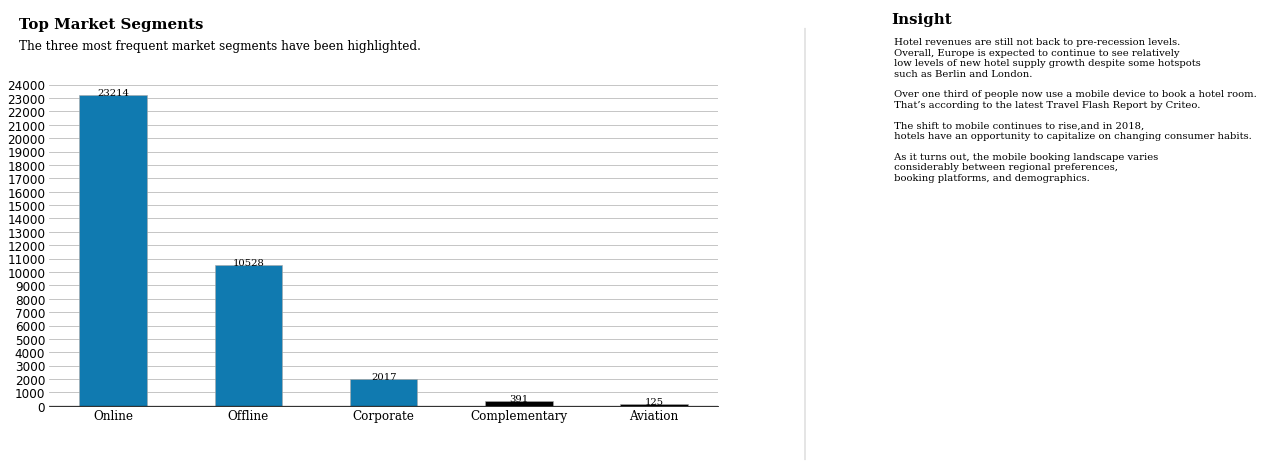

In [124]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_segment'] = df['market_segment_type'].apply(lambda x: x.split(",")[0])
df['first_segment'].head()

data = df.groupby('first_segment')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['black' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#107ab0' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
        linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
    
# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)


# Title and sub-title

fig.text(0.09, 1, 'Top Market Segments', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent market segments have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(1.1, 0.6, '''


 Hotel revenues are still not back to pre-recession levels.
 Overall, Europe is expected to continue to see relatively 
 low levels of new hotel supply growth despite some hotspots 
 such as Berlin and London.

 Over one third of people now use a mobile device to book a hotel room.
 That’s according to the latest Travel Flash Report by Criteo. 

 The shift to mobile continues to rise,and in 2018,
 hotels have an opportunity to capitalize on changing consumer habits.

 As it turns out, the mobile booking landscape varies 
 considerably between regional preferences,
 booking platforms, and demographics.
                                                       
''' , fontsize=10, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.9)   

grid_y_ticks = np.arange(0, 25000, 1000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)



plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

 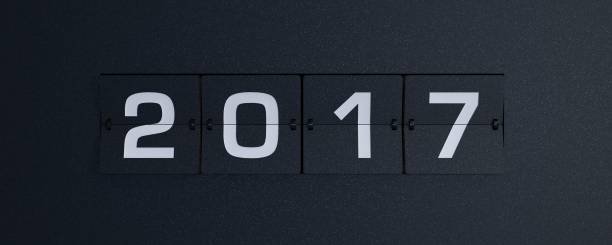

([<matplotlib.patches.Wedge at 0x7d1d03c7cf90>],
 [Text(-1.1, 1.3471114790620887e-16, 'canceled')],
 [Text(-0.6, 7.347880794884119e-17, '100%')])

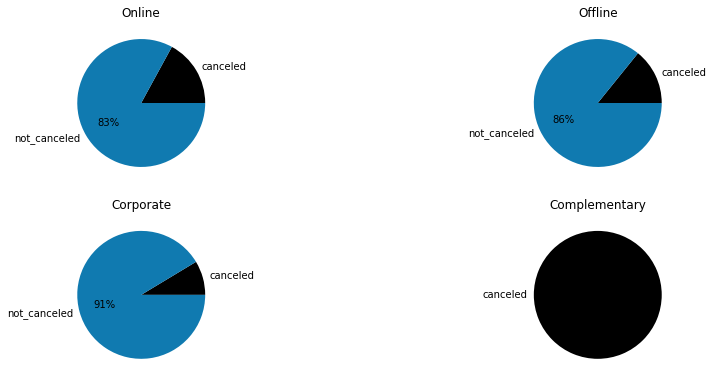

In [125]:

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)


ax1.set_title("Online")
ax2.set_title("Offline")
ax3.set_title("Corporate")
ax4.set_title("Complementary")


ax1.pie(df17[df17['market_segment_type']=='Online'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )
ax2.pie(df17[df17['market_segment_type']=='Offline'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )
ax3.pie(df17[df17['market_segment_type']=='Corporate'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )
ax4.pie(df17[df17['market_segment_type']=='Complementary'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled'],colors = ['black','#107ab0'] )


In 2017, there were no bookings for aviations as shown in the code below

In [126]:
dfav=df.loc[df.market_segment_type=='Aviation']
dfav

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,count,first_segment
27,INN00028,1,0,0,2,Meal Plan 1,0,Room_Type 4,2,2018,...,19,Aviation,0,0,0,110.0,0,Canceled,1,Aviation
1496,INN01497,1,0,0,1,Meal Plan 1,0,Room_Type 4,20,2018,...,26,Aviation,0,0,0,110.0,0,Canceled,1,Aviation
2272,INN02273,1,0,5,10,Meal Plan 1,0,Room_Type 1,11,2018,...,9,Aviation,0,0,0,95.0,0,Canceled,1,Aviation
2518,INN02519,1,0,1,1,Meal Plan 1,0,Room_Type 1,4,2018,...,19,Aviation,0,0,0,95.0,0,Not_Canceled,1,Aviation
2696,INN02697,1,0,1,3,Meal Plan 1,0,Room_Type 1,5,2018,...,4,Aviation,0,0,0,95.0,0,Not_Canceled,1,Aviation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33607,INN33608,1,0,0,1,Meal Plan 1,0,Room_Type 4,4,2018,...,29,Aviation,0,0,0,110.0,0,Canceled,1,Aviation
33956,INN33957,1,0,1,0,Meal Plan 1,0,Room_Type 4,2,2018,...,22,Aviation,0,0,0,110.0,0,Canceled,1,Aviation
34111,INN34112,1,0,1,3,Meal Plan 1,0,Room_Type 1,0,2018,...,2,Aviation,0,0,0,95.0,0,Not_Canceled,1,Aviation
34676,INN34677,1,0,1,3,Meal Plan 1,0,Room_Type 4,3,2018,...,19,Aviation,1,0,3,110.0,0,Not_Canceled,1,Aviation


In [127]:
dfav.loc[dfav.arrival_year=='2017']

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,count,first_segment


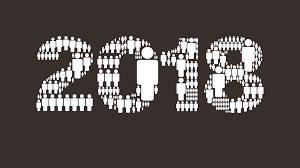



([<matplotlib.patches.Wedge at 0x7d1d03cc0b90>,
 [Text(0.6576954707964959, 0.8817236912399349, 'canceled'),
  Text(-0.6576954707964959, -0.8817236912399349, 'not_canceled')],
 [Text(0.3587429840708159, 0.48094019522178255, '30%'),
  Text(-0.3587429840708159, -0.48094019522178255, '70%')])

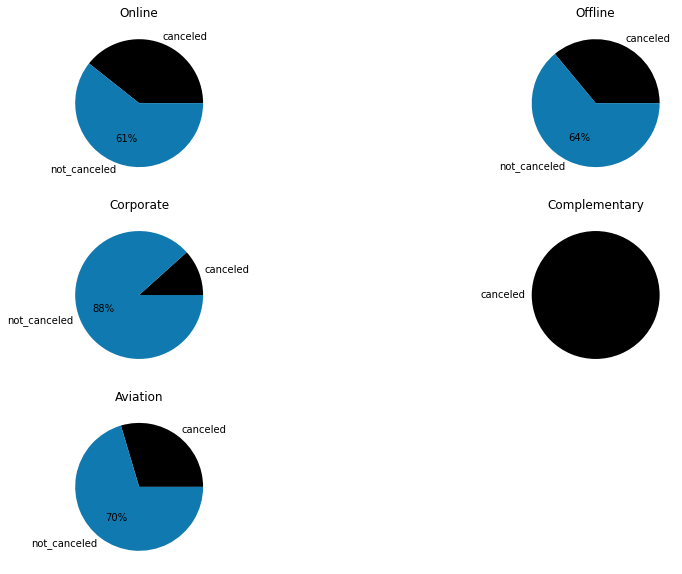

In [128]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)


ax1.set_title("Online")
ax2.set_title("Offline")
ax3.set_title("Corporate")
ax4.set_title("Complementary")
ax5.set_title("Aviation")


ax1.pie(df18[df18['market_segment_type']=='Online'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )
ax2.pie(df18[df18['market_segment_type']=='Offline'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )
ax3.pie(df18[df18['market_segment_type']=='Corporate'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )
ax4.pie(df18[df18['market_segment_type']=='Complementary'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled'],colors = ['black','#107ab0'] )
ax5.pie(df18[df18['market_segment_type']=='Aviation'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'],colors = ['black','#107ab0'] )


## Insights

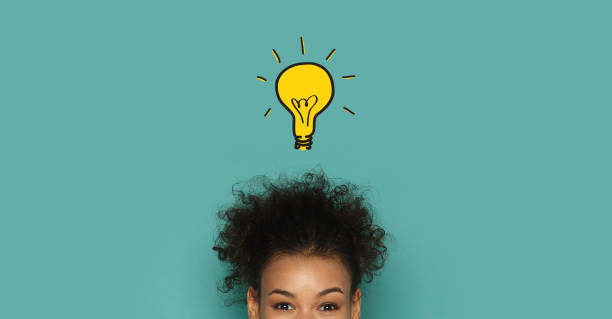

According to the article "European cities
hotel forecast
for 2017 and 2018" by PWC (https://www.pwc.com/gx/en/hospitality-leisure/assets/european-hotels-forecast-report-2017-2018-web.pdf),

 Hotel revenues are still not back to pre-recession
levels. Overall, Europe is expected to continue to see relatively low levels of new
hotel supply growth despite some hotspots such as Berlin and London.

Over one third of people now use a mobile device to book a hotel room. That’s according to the latest Travel Flash Report by Criteo.

The shift to mobile continues to rise, and in 2018, hotels have an opportunity to capitalize on changing consumer habits.

As it turns out, the mobile booking landscape varies considerably between regional preferences, booking platforms, and demographics. 

**Common Complaints About Online Hotel Bookings include** <br>Mishandled Reservations and Double Bookings, Incorrect Guest Preferences,Overpricing by third-parties and Third-Party Scams.

**Mishandled Reservations and Double Bookings** : <br>To proactively prevent these types of administrative errors, you’ll want to invest in a robust property management system (PMS)

**Incorrect Guest Preferences** : <br>
To handle these mistakes, all managers and staff should be well-trained in conflict resolution and customer communication.

**Overpricing by third-parties** : <br>
Give Travelers a Reason to Book Direct by giving importance of the hotel's website, improve its usability and make it easy to access while offering visitors an unforgettable Booking Journey Experience! 

**Third-Party Scams** : <br>
As a regular habit, monitor news and industry sites for word of these scams


References:

"European cities hotel forecast for 2017 and 2018" by PWC (https://www.pwc.com/gx/en/hospitality-leisure/assets/european-hotels-forecast-report-2017-2018-web.pdf) <br><br>
"Common Complaints About Online Hotel Bookings " by RoomKeyPMS (https://roomkeypms.com/blog/common-complaints-online-hotel-bookings-fix/)

## How much do guests pay for a room per night?



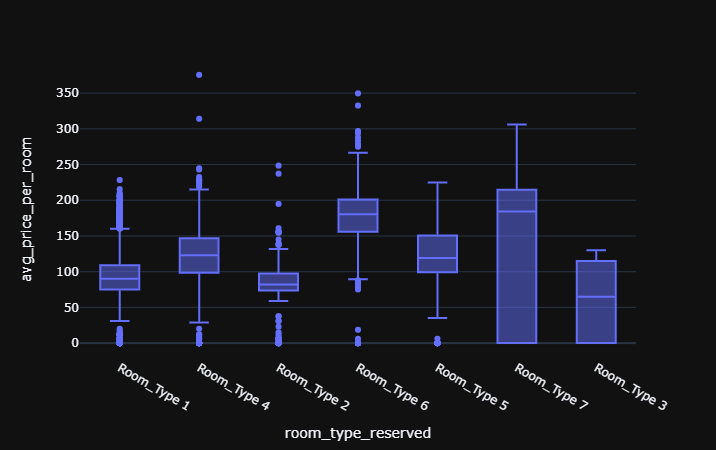

In [129]:
data = df[df['booking_status'] == 'Not_Canceled']

px.box(data_frame = data, x = 'room_type_reserved', y = 'avg_price_per_room', template = 'plotly_dark')

The figure shows that the average price per room depends on its type and the standard deviation.




## How does the price vary per night over the year?



In [130]:
Room_Type_1 = df[(df['room_type_reserved'] == 'Room_Type 1') & (df['booking_status'] == 'Not_Canceled')]
Room_Type_2 = df[(df['room_type_reserved'] == 'Room_Type 2') & (df['booking_status'] == 'Not_Canceled')]
Room_Type_3 = df[(df['room_type_reserved'] == 'Room_Type 3') & (df['booking_status'] == 'Not_Canceled')]
Room_Type_4 = df[(df['room_type_reserved'] == 'Room_Type 4') & (df['booking_status'] == 'Not_Canceled')]
Room_Type_5 = df[(df['room_type_reserved'] == 'Room_Type 5') & (df['booking_status'] == 'Not_Canceled')]
Room_Type_6 = df[(df['room_type_reserved'] == 'Room_Type 6') & (df['booking_status'] == 'Not_Canceled')]
Room_Type_7 = df[(df['room_type_reserved'] == 'Room_Type 7') & (df['booking_status'] == 'Not_Canceled')]

In [131]:
Room_Type_1 = Room_Type_1.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_1

,arrival_month,avg_price_per_room
0,1,73.962208
1,2,76.805631
2,3,81.961119
3,4,91.813955
4,5,102.676935
5,6,104.417918
6,7,98.982453
7,8,101.078118
8,9,104.608002
9,10,95.755048


In [132]:
Room_Type_2 = Room_Type_2.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_2

,arrival_month,avg_price_per_room
0,1,70.301333
1,2,72.512424
2,3,80.068718
3,4,73.858889
4,5,122.170000
5,6,104.527778
6,7,75.534800
7,8,82.382545
8,9,90.536667
9,10,88.686667


In [133]:
Room_Type_3 = Room_Type_3.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_3

,arrival_month,avg_price_per_room
0,10,97.5
1,11,110.0
2,12,0.0


In [134]:
Room_Type_4 = Room_Type_4.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_4

,arrival_month,avg_price_per_room
0,1,77.019500
1,2,100.068012
2,3,106.947774
3,4,118.763716
4,5,132.065159
5,6,130.788611
6,7,138.665702
7,8,139.106962
8,9,136.861046
9,10,120.166370


In [135]:
Room_Type_5 = Room_Type_5.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_5

,arrival_month,avg_price_per_room
0,1,80.583333
1,2,88.641176
2,3,93.674000
3,4,116.947273
4,5,143.294762
5,6,119.281429
6,7,115.536522
7,8,107.242222
8,9,139.531111
9,10,117.378571


In [136]:
Room_Type_6 = Room_Type_6.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_6

,arrival_month,avg_price_per_room
0,1,144.550000
1,2,134.382609
2,3,158.850833
3,4,175.336957
4,5,198.914286
5,6,200.203333
6,7,195.042368
7,8,182.041000
8,9,196.376753
9,10,173.996522


In [137]:
Room_Type_7 = Room_Type_7.groupby(['arrival_month'])['avg_price_per_room'].mean().reset_index()
Room_Type_7

,arrival_month,avg_price_per_room
0,1,0.333333
1,2,117.252000
2,3,66.766667
3,4,121.996000
4,5,140.492727
5,6,29.871429
6,7,216.656923
7,8,156.558824
8,9,166.530000
9,10,170.558889


In [138]:
final_hotel1 = Room_Type_1.merge(Room_Type_2, on = 'arrival_month')
final_hotel2 = final_hotel1.merge(Room_Type_4, on = 'arrival_month')
final_hotel3 = final_hotel2.merge(Room_Type_5, on = 'arrival_month')
final_hotel4 = final_hotel3.merge(Room_Type_6, on = 'arrival_month')
final_hotel5 = final_hotel4.merge(Room_Type_7, on = 'arrival_month')

final_hotel5.columns = ['month', 'price_for_room1', 'price_for_room2','price_for_room4','price_for_room5','price_for_room6','price_for_room7']

final_hotel5

,month,price_for_room1,price_for_room2,price_for_room4,price_for_room5,price_for_room6,price_for_room7
0,1,73.962208,70.301333,77.019500,80.583333,144.550000,0.333333
1,2,76.805631,72.512424,100.068012,88.641176,134.382609,117.252000
2,3,81.961119,80.068718,106.947774,93.674000,158.850833,66.766667
3,4,91.813955,73.858889,118.763716,116.947273,175.336957,121.996000
4,5,102.676935,122.170000,132.065159,143.294762,198.914286,140.492727
5,6,104.417918,104.527778,130.788611,119.281429,200.203333,29.871429
6,7,98.982453,75.534800,138.665702,115.536522,195.042368,216.656923
7,8,101.078118,82.382545,139.106962,107.242222,182.041000,156.558824
8,9,104.608002,90.536667,136.861046,139.531111,196.376753,166.530000
9,10,95.755048,88.686667,120.166370,117.378571,173.996522,170.558889


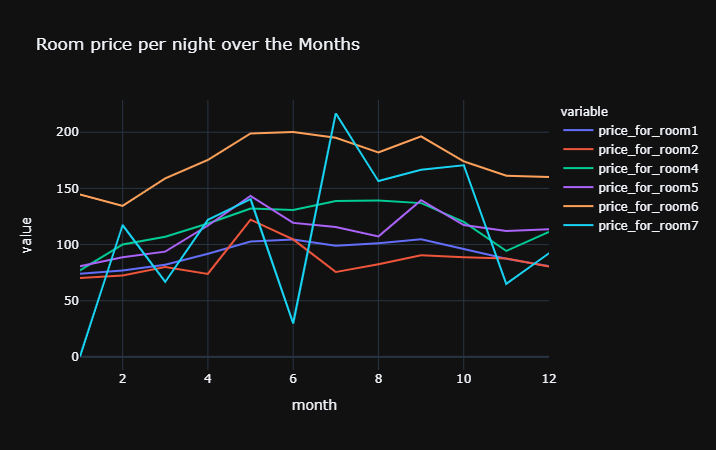

<Figure size 1224x576 with 0 Axes>

In [139]:
plt.figure(figsize = (17, 8))

px.line(final_hotel5, x = 'month', y = ['price_for_room1','price_for_room2','price_for_room4','price_for_room5','price_for_room6','price_for_room7'],
        title = 'Room price per night over the Months',template = 'plotly_dark')

This plot clearly shows that 

Room 1 varies and is most expensive during Spring and Autumn. <br>
Room 2 peaks once during Spring.<br>
Room 3 is seasonal and is booked only during Winter. <br>
Price for room 4 is higher during Autumn.<br>
Price for room 5 increases twice over the year during Spring and Autumn.<br>
Room 6 is the highest priced room and is mostly booked during Spring and Autumn.<br>
Room 7 varies a lot and is most expensive during Autumn.







## Which are the most busy months?



In [140]:
hotel_guests = df['arrival_month'].value_counts().reset_index()
hotel_guests.columns=['arrival_month','no_of_guests']
hotel_guests

hotel_guests.sort_values(by=["arrival_month"],axis=0,ascending=True)


,arrival_month,no_of_guests
11,1,1014
10,2,1704
9,3,2358
7,4,2736
8,5,2598
3,6,3203
6,7,2920
2,8,3813
1,9,4611
0,10,5317


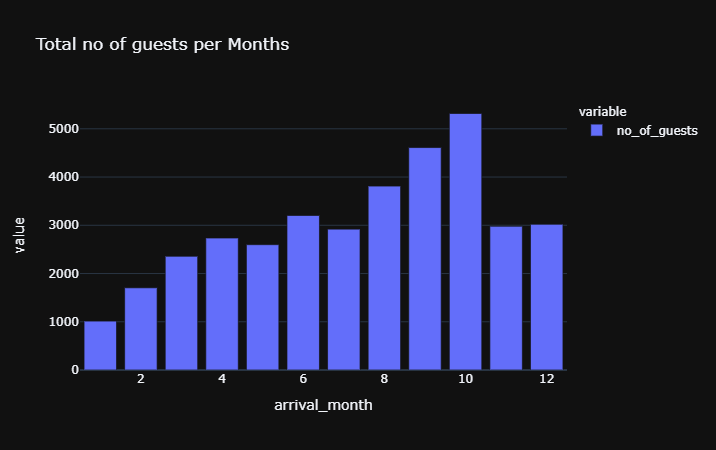

In [141]:
px.bar(hotel_guests, x = 'arrival_month', y = ['no_of_guests'],
        title='Total no of guests per Months', template = 'plotly_dark')


The graph clearly shows that the hotel is busiest during autumn.

## How long do people stay at the hotels?



In [146]:
filter =df.loc[df.booking_status=='Not_Canceled']

filter.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,count,first_segment
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,1,Offline
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,1,Online
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,...,15,Online,0,0,0,107.55,1,Not_Canceled,1,Online
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,26,Online,0,0,0,105.61,1,Not_Canceled,1,Online
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,...,6,Offline,0,0,0,96.90,1,Not_Canceled,1,Offline


In [147]:
filter['total_nights'] = filter['no_of_weekend_nights'] + filter['no_of_week_nights']
filter.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,count,first_segment,total_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,1,Offline,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,1,Online,5
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,...,Online,0,0,0,107.55,1,Not_Canceled,1,Online,4
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,Online,0,0,0,105.61,1,Not_Canceled,1,Online,4
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,...,Offline,0,0,0,96.90,1,Not_Canceled,1,Offline,4


In [148]:
stay = filter.groupby(['total_nights','room_type_reserved']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay.columns=['total_nights','room_type_reserved','no_of_stays']
#stay = stay.rename(columns={'Canceled':'Number of stays'})
stay

,total_nights,room_type_reserved,no_of_stays
0,0,Room_Type 1,62
1,0,Room_Type 2,2
2,0,Room_Type 4,9
3,0,Room_Type 6,2
4,0,Room_Type 7,1
...,...,...,...
76,17,Room_Type 4,1
77,19,Room_Type 1,1
78,20,Room_Type 1,3
79,21,Room_Type 1,1


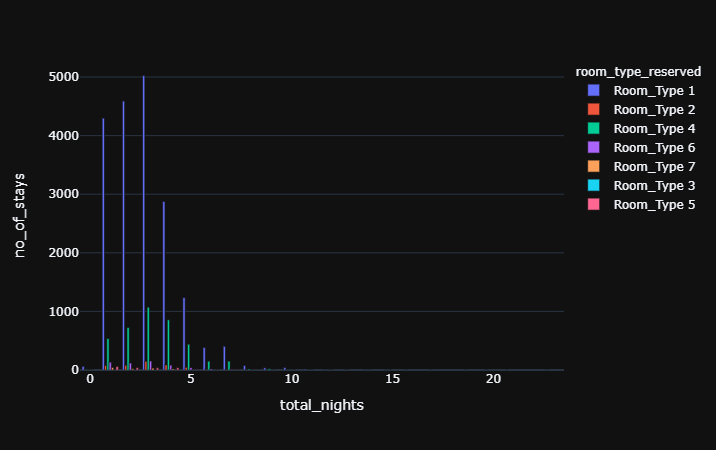

In [149]:
px.bar(data_frame = stay, x = 'total_nights', y = 'no_of_stays', color = 'room_type_reserved', barmode = 'group',
        template = 'plotly_dark')



The longest number of nights reserved is between 10 and 13.<br>
People typically spend one to three days for Room 1.<br>
Room 1 is mostly prefered and is highly booked,followed by Room 4



### References:

"European cities hotel forecast for 2017 and 2018" by PWC (https://www.pwc.com/gx/en/hospitality-leisure/assets/european-hotels-forecast-report-2017-2018-web.pdf) <br><br>
"Common Complaints About Online Hotel Bookings " by RoomKeyPMS (https://roomkeypms.com/blog/common-complaints-online-hotel-bookings-fix/) <br>
"Hotel Booking Prediction (99.5% acc)" by NITESH YADAV https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc